# 데이터 다운로드 및 업로드
### healthcare-dataset-stroke-data.csv 파일을 다운로드 받기
### https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


1. 데이터 로딩
2. EDA
  - 피처간 상관관계 보기
  - 카운트 플랏 
3. 데이터 전처리
  - 불필요한 Feature 제거
  - 결측치 처리
  - 문자열 데이터 숫자로 인코딩 
4. 머신러닝 모델 만들기
  - 학습/테스트 데이터 준비하기
  - 학습모델 학습하기
5. 성능평가
  - 모델 테스트하기
  - 성능 평가하기

In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 불필요한 Feature 제거

In [7]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA(탐색적 데이터 분석)
- 데이터 통계량 확인하기
- 데이터의 특징 파악하기
- feature들 간의 상관관계
- feature와 target과의 관계에서 어떤 특징들이 있는지 탐색하기

In [8]:
# 수치형 데이터 통계량 확인하기
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 테이블 데이터 통계 확인

In [9]:
# 범주형 데이터 컬럼 리스트 추출
cat_columns = df.select_dtypes(exclude=np.number).columns.to_list()
cat_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [10]:
# 수치형 데이터 컬럼 리스트 추출
num_columns = df.select_dtypes(include=np.number).columns.to_list()
num_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [11]:
# 문자형 데이터 통계 확인
df[cat_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [12]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [13]:
# 수치형 데이터 기초 통계 확인
df[num_columns].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## 데이터 시각화로 탐색하기

<Axes: xlabel='gender', ylabel='count'>

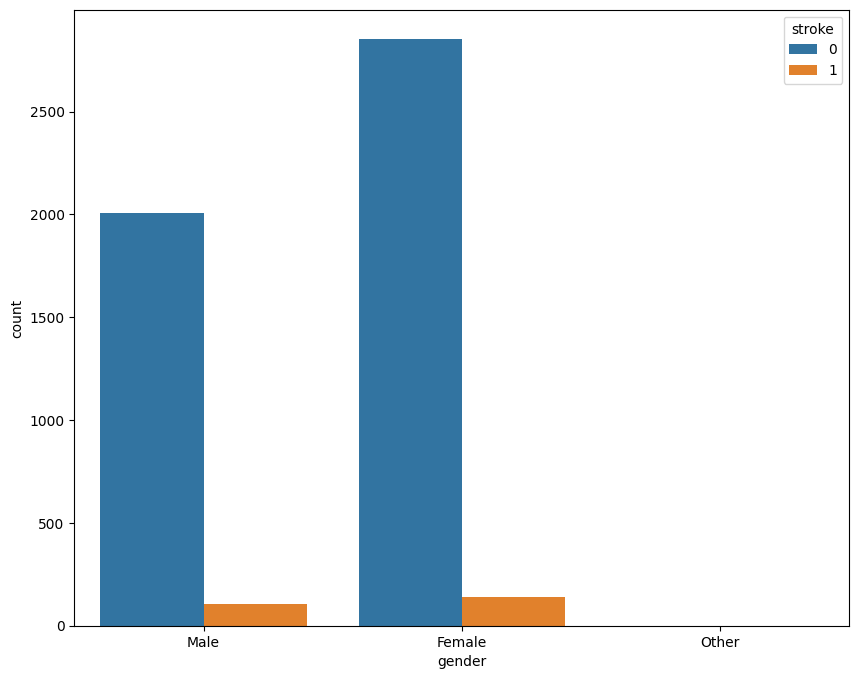

In [15]:
# 성별에 따른 stroke의 0. 1 환자수 카운트 시각화 
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='gender', hue='stroke')

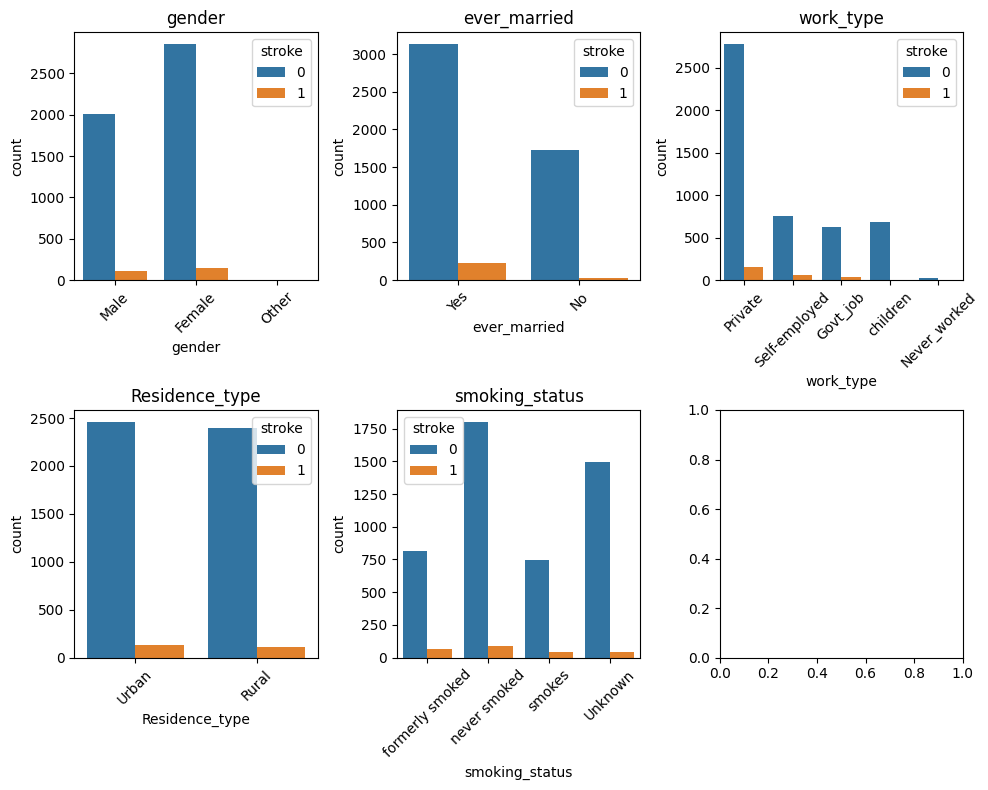

In [16]:
# 문자형 데이터 개별 값과 stroke와의 관계 확인하기
nrows, ncols = 2, 3
figure, axs = plt.subplots(nrows=nrows, ncols=ncols);
figure.set_size_inches(10,8)
axs = axs.flatten()

for i, col in enumerate(cat_columns):
    fig = sns.countplot(data=df, x=col, hue='stroke', ax=axs[i])
    fig.set_title(col)
    plt.setp(fig.get_xticklabels(), rotation=45)  # x축 레이블 각도 조절

plt.tight_layout()
plt.show()

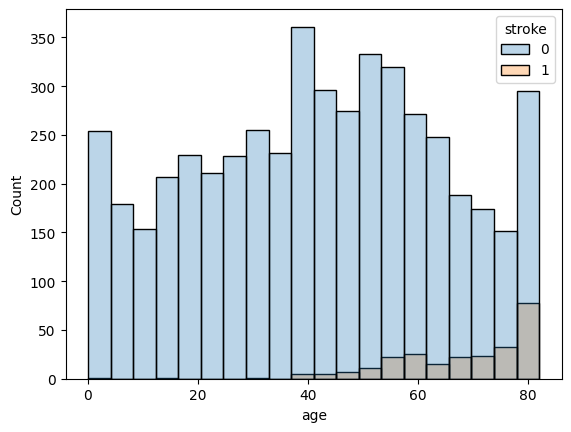

In [17]:
# 나이와 stroke과의 관계 확인하기(histplot())
sns.histplot(data=df, x='age', hue='stroke', alpha=0.3);

In [18]:
df['bmi'].count()

np.int64(4909)

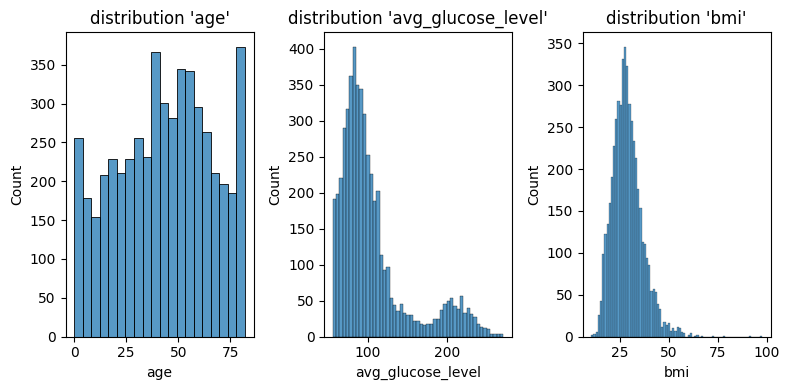

In [19]:
# sns.histplot()으로, 수치형 데이터의 분포 알아보기
num_columns_g = ['age', 'avg_glucose_level', 'bmi']
nrows, ncols = 1, 3
figure, axs = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(8,4)
ax_list = axs.flatten()

for i, col in enumerate(num_columns_g):
    fig = sns.histplot(data=df, x=df.loc[:, col], ax=axs[i])
    fig.set_title(f"distribution '{col}'")
    
plt.tight_layout()
plt.show()

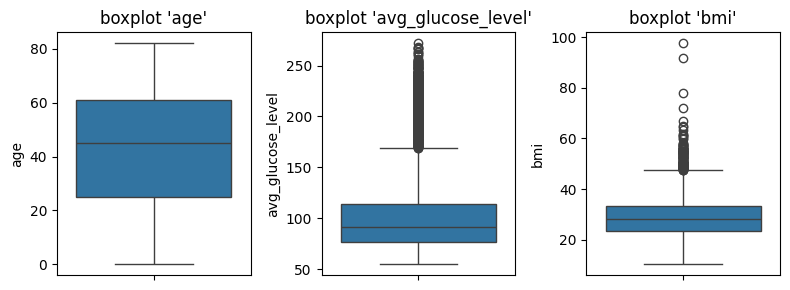

In [20]:
# 통계량은 boxplot으로 살펴보고, sns.boxplots() 활용
nrows, ncols = 1, 3
figure, axs = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(8,3)
axs = axs.flatten()

for i, col in enumerate(num_columns_g):
    fig = sns.boxplot(data=df, y=col,  ax=axs[i])
    fig.set_title(f"boxplot '{col}'")
    
plt.tight_layout()
plt.show()

In [21]:
nums_df = df[num_columns]
corr = nums_df.corr()

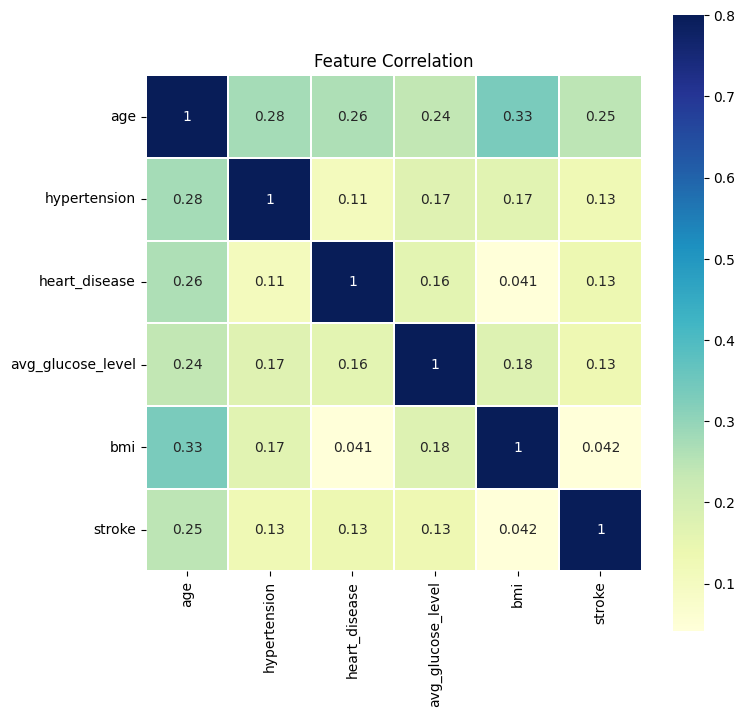

In [22]:
# 피처들간의 상관관계 살펴보기
plt.figure(figsize=(8, 8));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation');

## 결측치 처리하기

In [23]:
# 결측데이터 확인하기
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [24]:
# 결측 데이터 처리
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## 문자형 데이터 숫자로 encoding하기

In [26]:
# 범주형 데이터 기술통계 확인
df[cat_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [27]:
# LabelEncoder 적용
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['work_type'] = le.fit_transform(df['work_type'])
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [28]:
# one-hot-encoding 적용
df = pd.get_dummies(df, columns=cat_columns)

In [29]:
df.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_0,gender_1,gender_2,ever_married_0,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,67.0,0,1,228.69,36.600000,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False


## 학습 데이터 저장하기

In [30]:
import os

# 폴더 경로 지정
folder_path = "data"

# 폴더가 존재하는지 확인하고, 없으면 생성
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"'{folder_path}' 폴더가 생성되었습니다.")
else:
    print(f"'{folder_path}' 폴더가 이미 존재합니다.")

df.to_csv('data/healthcare-dataset-stroke-data_clean.csv', index=False)


'data' 폴더가 이미 존재합니다.


## 트레이닝 데이터 준비하기

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
X = df.drop('stroke', axis = 1) # 독립변수, 설명변수, feature
y = df['stroke']  # 종속변수, target

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2025)

# 머신러닝 모델 학습, 예측

## Decision Tree로 모델만들고 예측하기

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

accuracy : 0.901174168297456


In [35]:
from sklearn.metrics import classification_report, roc_auc_score

In [36]:
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"DecisionTreeClassifier roc_auc : {roc_auc}")

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       972
           1       0.10      0.12      0.11        50

    accuracy                           0.90      1022
   macro avg       0.52      0.53      0.53      1022
weighted avg       0.91      0.90      0.91      1022

DecisionTreeClassifier roc_auc : 0.530679012345679


## 랜덤포레스트로 모델 만들고 예측하기

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('RandomForestClassifier accuracy :', accuracy)

RandomForestClassifier accuracy : 0.9500978473581213


In [38]:
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"roc_auc : {roc_auc}")

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.33      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022

roc_auc : 0.5089711934156379


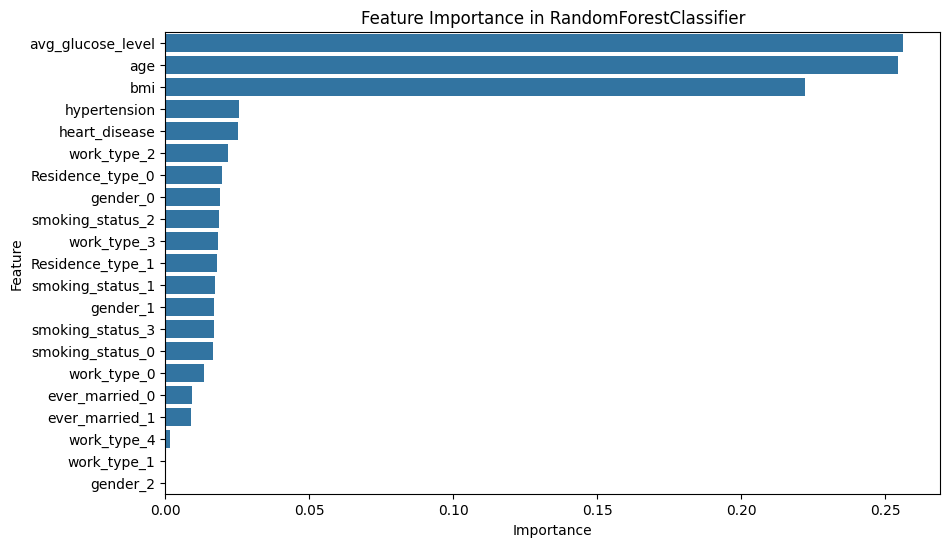

In [39]:
# 피처 중요도 추출
importances = rf_clf.feature_importances_

# 중요도를 DataFrame으로 변환
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# 6. 중요도 순으로 정렬
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 7. 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importance in RandomForestClassifier')
plt.show()

## XGBClassifier로 모델만들고 예측하기
- https://xgboost.readthedocs.io/en/stable/
- 한글 정리문서 : https://wooono.tistory.com/97

In [40]:
from xgboost import XGBClassifier
# xgb_clf = XGBClassifier()
xgb_clf = XGBClassifier(objective='binary:logistic')

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

accuracy : 0.9432485322896281


In [41]:
# classification_report() 결과 출력
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"XGBClassifier roc_auc : {roc_auc}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.28      0.10      0.15        50

    accuracy                           0.94      1022
   macro avg       0.62      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022

XGBClassifier roc_auc : 0.5433127572016462


In [42]:
from sklearn.metrics import roc_auc_score

# y_true: 실제 타깃값 (0 또는 1로 이루어진 배열)
# y_pred: 예측된 확률값 (0과 1 사이의 확률로 이루어진 배열)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)

0.5433127572016462


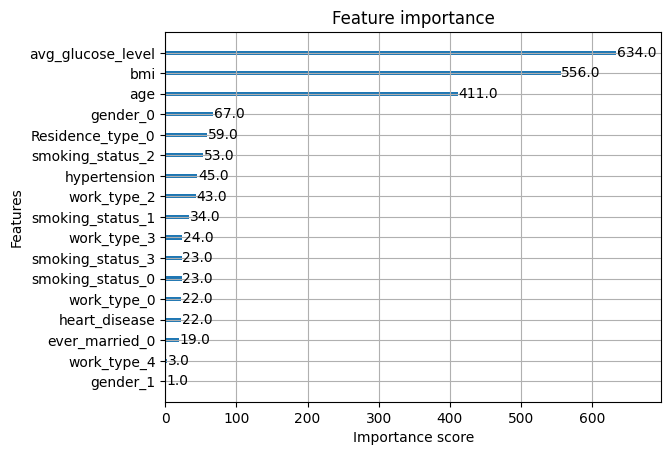

In [43]:
#xgboost의 강력한 기능 Feature Importance 확인
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_clf)
pyplot.show()

## Light GBM

- 공식 문서 : https://lightgbm.readthedocs.io/en/v3.3.2/
- pip install lightgbm

In [44]:
from lightgbm import LGBMClassifier

In [45]:
lgbm_clf = LGBMClassifier()

In [46]:
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy :', accuracy)

[LightGBM] [Info] Number of positive: 199, number of negative: 3889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048679 -> initscore=-2.972603
[LightGBM] [Info] Start training from score -2.972603
accuracy : 0.9412915851272016


In [47]:
# 레포트
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"LGBMClassifier : {roc_auc}")

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.19      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.57      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022

LGBMClassifier : 0.523312757201646


[설명]
다음의 평가 지표들은 모델의 분류 성능을 평가하고 클래스별로 성능 차이를 확인하는 데 도움을줌
- macro avg  
    - 클래스당 개별 지표의 평균
    - 모든 클래스를 동등하게 다루기 때문에 클래스 불균형(class imbalance)이 있는 데이터셋에서 유용함
- weighted avg
    - 각 클래스의 샘플 수에 따라 가중치를 부여하여 평균을 계산
    - 클래스에 따라 샘플 수가 다르면 해당 클래스의 지표에 가중치를 부여하여 평균을 계산
    - 샘플 수가 많은 클래스의 성능이 더 큰 영향을 미침
    - weighted avga은 클래스 간의 불균형이 있는 데이터셋에서 사용될 때 유용함

### roc/auc score
- ROC-AUC는 이진 분류에서 많이 사용되는 평가 지표로서, 분류 모델의 성능을 평가하는 데 사용됨
- ROC-AUC는 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델의 성능이 우수함

# GridSearchCV 사용하기
- Best Hyper Parameter 찾기

In [48]:
from sklearn.model_selection import GridSearchCV

## XGBClassifier 학습기 GridSearchCV

#### XGBoost의 booster
- gbtree: 기본 트리 기반 부스팅 (Gradient Boosted Trees)
- dart: 드롭아웃 방식의 부스팅, 일부 트리를 무작위로 드롭하여 과적합을 방지함
- gblinear: 선형 부스팅, 선형회귀나 로지스틱 회귀 같은 선형문제에 적합
#### 주요 하이퍼 파라미터
- booster: 부스팅 알고리즘을 선택하며, 트리 기반, 드롭아웃, 선형 모델 중에서 선택할 수 있음
- n_estimators: 트리의 개수로, 트리 수가 많을수록 성능이 높아질 수 있지만, 과적합의 위험이 있음
- max_depth: 트리의 최대 깊이로, 깊을수록 복잡한 모델이 됨
- gamma: 분할의 최소 손실 감소값으로, 값이 클수록 더 적은 분할이 이루어지며 모델이 간단해짐
- colsample_bytree: 각 트리에서 사용할 특성의 비율로, 과적합을 방지하는 역할을 함
- learning_rate: 학습률로, 작은 값은 학습을 느리게 하지만 더 정밀한 결과를 얻을 수 있고, 큰 값은 빠르게 수렴하지만 과적합의 위험이 있음

In [49]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [59]:
# xgboost의 best param을 찾기위한 grid map 정의
cv_params = {
    'booster': ['dbtree', 'dart'],
    'n_estimators': [200, 250, 300, 350, 400],   
    'max_depth': [5, 6, 7],               
    'gamma': [2, 3],                      
    'colsample_bytree': [0.8, 0.9],       
    'learning_rate': [0.01, 0.02, 0.03]

    # 실험1
    # 'n_estimators' : [100, 200, 300, 400, 500],  # 5개
    # 'max_depth' : [3, 5, 7, 10, 15],             # 5개
    # 'gamma' : [0, 1, 2, 3],                      # 4개
    # 'colsample_bytree' : [0.8, 0.9],             # 2개
    # 'learning_rate' : [0.01, 0.05, 0.1, 0.15],   # 4개
}

In [60]:
grid_cv = GridSearchCV(xgb_clf, param_grid=cv_params, scoring="recall", cv=4, n_jobs=-1)

In [61]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['dbtree', 'dart'],
                         'colsample_bytree': [0.8, 0.9], 'gamma': [2, 3],
                         'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [200, 250, 300, 350, 400]},
             scoring='recall')

In [62]:
#best f1_macro 수치와 best parameter확인
print(f"Best score of paramter search is: {grid_cv.best_estimator_}")
print(f"Best score of paramter search is: {grid_cv.best_score_:.10f}")
print(f"Best param : {grid_cv.best_params_}")

Best score of paramter search is: XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)
Best score of paramter search is: 0.0000000000
Best param : {'booster': 'dart', 'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


In [66]:
y_pred = grid_cv.predict(X_test)

In [67]:
# confusion matrix 계산
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# 출력
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[972   0]
 [ 50   0]]


In [68]:
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"grid_cv roc_auc : {roc_auc}")

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

grid_cv roc_auc : 0.5
